In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

import sys
sys.path.append('../')
from functions.plot_images import plot_images
from functions.model_vgg import train_and_eval_VGG
from functions.model_cnn import train_and_eval_CNN

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Randomly split the training data into a training and validation set using train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Describe the shape of the training, validation, and test sets
for dataset, images in zip(['Training', 'Validation', 'Test'], [train_images, val_images, test_images]):
    print(f'{dataset} images shape: {images.shape}')

Training images shape: (48000, 28, 28)
Validation images shape: (12000, 28, 28)
Test images shape: (10000, 28, 28)


Training set 5 first images:


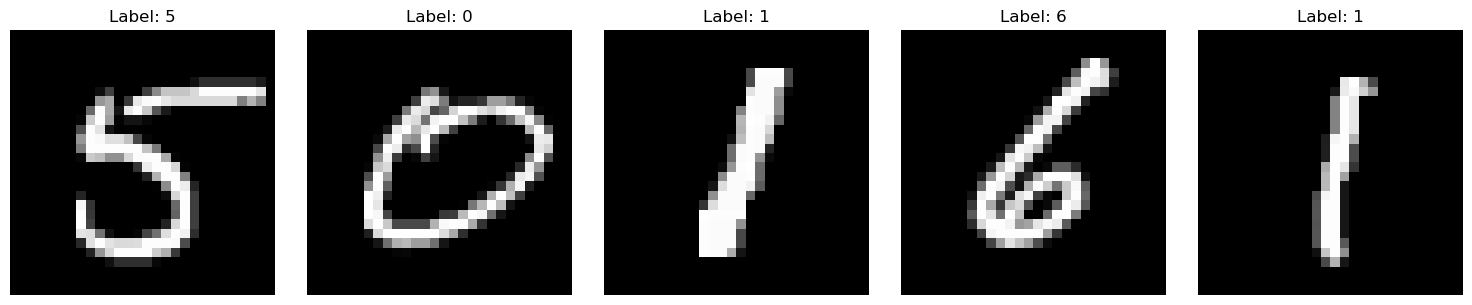

Validation set 5 first images:


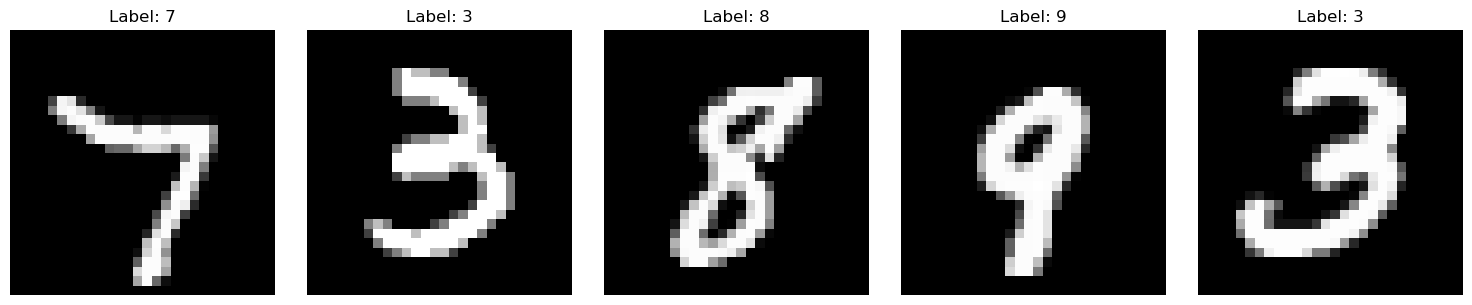

Test set 5 first images:


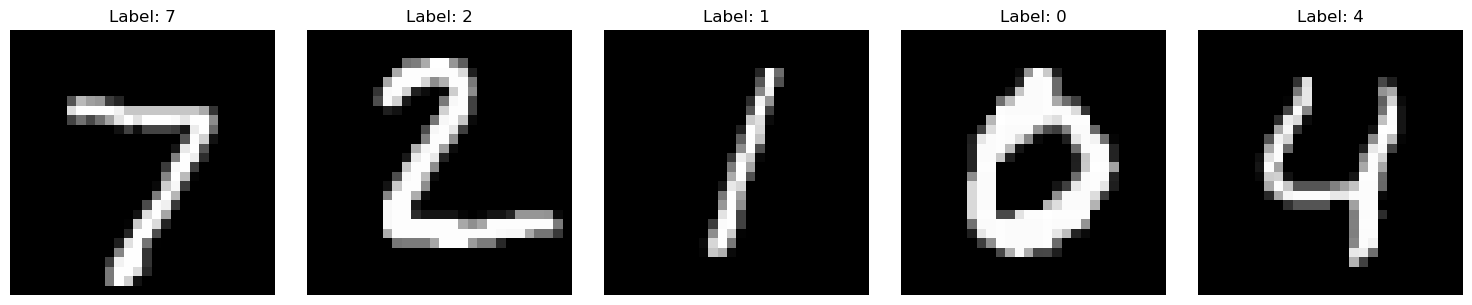

In [3]:
# Plot the first 5 labels from each of the training, validation, and test sets
for dataset, images, labels in zip(['Training', 'Validation', 'Test'], [train_images, val_images, test_images], [train_labels, val_labels, test_labels]):
    print(f'{dataset} set 5 first images:')
    plot_images(images[:5], labels[:5])


Training set 5 first images:


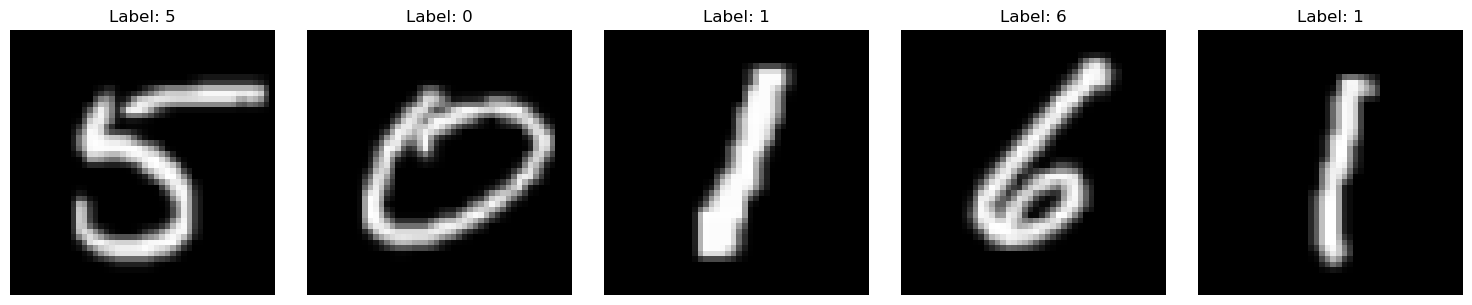

Validation set 5 first images:


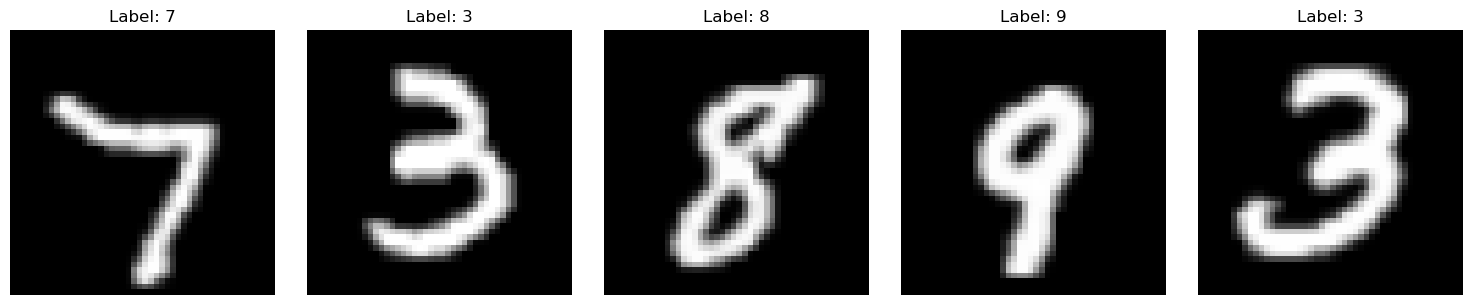

Test set 5 first images:


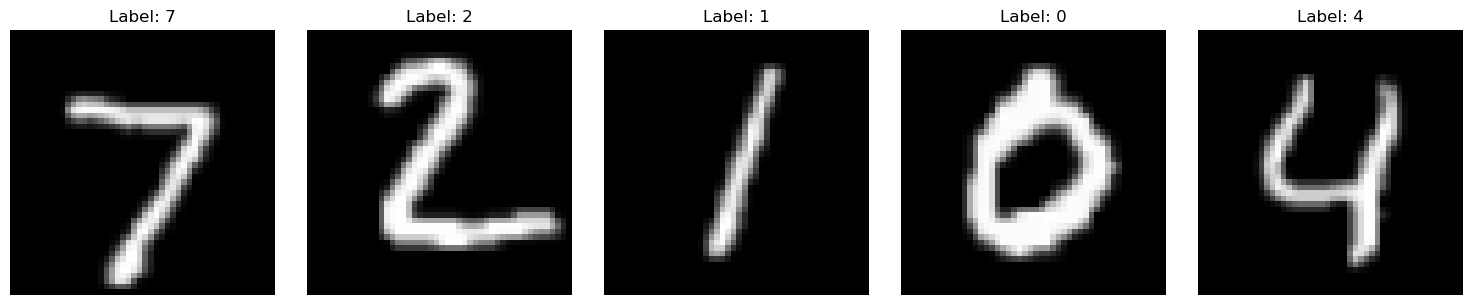

In [4]:
# Add a channel dimension to the images ti fit model entry
X_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
X_val = val_images.reshape(val_images.shape[0], 28, 28, 1)
X_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Resize the images to 48x48
X_train = np.array([cv2.resize(img, (48,48)) for img in X_train])
X_val = np.array([cv2.resize(img, (48,48)) for img in X_val])
X_test = np.array([cv2.resize(img, (48,48)) for img in X_test])
X_train = X_train.reshape(-1, 48, 48, 1)
X_val = X_val.reshape(-1, 48, 48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)

# Normalize the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# Print first image's new shape for verification
X_train[0].shape

# Re-plot the first 5 labels from each of the training, validation, and test sets
for dataset, images, labels in zip(['Training', 'Validation', 'Test'], [X_train, X_val, X_test], [train_labels, val_labels, test_labels]):
    print(f'{dataset} set 5 first images:')
    plot_images(images[:5], labels[:5])


In [5]:
NUM_CLASSES = 10

# Convert the labels to one-hot encoding
y_train = to_categorical(train_labels, NUM_CLASSES)
y_val = to_categorical(val_labels, NUM_CLASSES)
y_test = to_categorical(test_labels, NUM_CLASSES)

In [6]:
%%time
# Train and evaluate the VGG model
model = train_and_eval_CNN(X_train, y_train, X_val, y_val, X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [7]:
# Save the model with pickle
# import pickle
# with open('../models/number_recon_model.keras', 'wb') as f:
#     pickle.dump(model, f)

model.save('..\\models\\number_recon_model.keras')